### Setup the Spark VM and complete the below assignment

Objective:- Build a ML model to predict the employee compensation.
The application should be modelled using Spark.

You can refer to the below links for spark commands:- 
- https://spark.apache.org/docs/latest/ml-pipeline.html

- https://github.com/spark-in-action/first-edition

- https://github.com/FavioVazquez/first_spark_model

# Predicting Employee Compensation

## Data Dictionary
<br>**Year Type** - Fiscal (July through June) or Calendar (January through December)
<br>**Year** - An accounting period of 12 months. The City and County of San Francisco operates on a fiscal year that begins on July 1 and ends on June 30 the following year. The Fiscal Year ending June 30, 2012 is represented as FY2011-2012.
<br>**Organization Group Code** - Org Group is a group of Departments. For example, the Public Protection Org Group includes departments such as the Police,Fire, Adult Probation, District Attorney, and Sheriff.
<br> **Organization Group** - Org Group is a group of Departments. For example, the Public Protection Org Group includes departments such as the Police,
Fire, Adult Probation, District Attorney, and Sheriff.
<br>**Department Code** - Departments are the primary organizational unit used by the Cityand County of San Francisco. Examples include Recreation and
Parks, Public Works, and the Police Department.
<br>**Department Code** - Departments are the primary organizational unit used by the City and County of San Francisco. Examples include Recreation and Parks, Public Works, and the Police Department.
<br>**Union Code** - Unions represent employees in collective bargaining agreements. A job belongs to one union, although some jobs are unrepresented (usually temporarily).
<br>**Union** - Unions represent employees in collective bargaining agreements. A job belongs to one union, although some jobs are unrepresented (usually temporarily).
<br>**Job Family Code** Job Family combines similar Jobs into meaningful groups.
<br>**Job Family** Job Family combines similar Jobs into meaningful groups.
<br>**Employee Identifier** Each distinct number in the “Employee Identifier” column represents one employee. These identifying numbers are not meaningful but rather are randomly assigned for the purpose of building this dataset. The column does not appear on the
Employee Compensation report hosted on openbook.sfgov.org,
but that report does show one row for each employee. Employee
ID has been included here to allow users to reconstruct the
original report. Note that each employee’s identifier will change
each time this dataset is updated, so comparisons by employee
across multiple versions of the dataset are not possible.
<br>**Salaries** - Normal salaries paid to permanent or temporary City employees.
<br>**Overtime** - Amounts paid to City employees working in excess of 40 hours
per week.
<br>**Other Salaries** - Various irregular payments made to City employees including premium pay, incentive pay, or other one-time payments. Total Salary Number The sum of all salaries paid to City employees.
<br>**Retirement** City contributions to employee retirement plans.
<br>**Health/Dental** City-paid premiums to health and dental insurance plans covering City employees. To protect confidentiality as legally required, pro-rated citywide averages are presented in lieu of employee-specific health and dental benefits.
<br>**Other Benefits** Mandatory benefits paid on behalf of employees, such as Social Security (FICA and Medicare) contributions, unemployment
insurance premiums, and minor discretionary benefits not included in the above categories.
<br>**Total Benefits** The sum of all benefits paid to City employees.
<br>**Total Compensation** The sum of all salaries and benefits paid to City employees.

Read the data and answer the following questions to predict employee compensation

### Loading Libraries

In [1]:
from pyspark.sql import DataFrame, SparkSession
from typing import List
import pyspark.sql.types as T
import pyspark.sql.functions as F


spark = SparkSession \
       .builder \
       .appName("EmployeeCompensation") \
       .getOrCreate()

spark

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Read the Data

In [3]:
file_location = "Employee_Compensation.csv"
file_type = "csv"

# CSV options
infer_schema = True
first_row_is_header = True
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
empcomDF = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

In [4]:
empcomDF.show(5, False)

+---------+----+-----------------------+--------------------+---------------+------------------------------+----------+---------------------------------+---------------+-----------------------------+--------+---------------------------+-------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+
|Year Type|Year|Organization Group Code|Organization Group  |Department Code|Department                    |Union Code|Union                            |Job Family Code|Job Family                   |Job Code|Job                        |Employee Identifier|Salaries |Overtime|Other Salaries|Total Salary|Retirement|Health/Dental|Other Benefits|Total Benefits|Total Compensation|
+---------+----+-----------------------+--------------------+---------------+------------------------------+----------+---------------------------------+---------------+-----------------------------+--------+---------------------------+--------

#### 1.1 Display the number of rows and columns in the dataset

In [5]:
# extracting number of rows from the Dataframe
row = empcomDF.count()
   
# extracting number of columns from the Dataframe
col = len(empcomDF.columns)
 
# printing
print(f'Dimension of the Dataframe is: {(row,col)}')
print(f'Number of Rows are: {row}')
print(f'Number of Columns are: {col}')

Dimension of the Dataframe is: (291825, 22)
Number of Rows are: 291825
Number of Columns are: 22


#### 1.2 Check the datatype of the variables

In [6]:
#Get All column names and it's types
for col in empcomDF.dtypes:
    print(col[0]+" : "+col[1])

Year Type : string
Year : int
Organization Group Code : int
Organization Group : string
Department Code : string
Department : string
Union Code : int
Union : string
Job Family Code : string
Job Family : string
Job Code : string
Job : string
Employee Identifier : int
Salaries : double
Overtime : double
Other Salaries : double
Total Salary : double
Retirement : double
Health/Dental : double
Other Benefits : double
Total Benefits : double
Total Compensation : double


### 2. Convert the incorrect column type into its suitable column type. And drop the redundant features

In [7]:
# dropping redundant features
empcomDF1 = empcomDF.drop("Organization Group","Department","Union","Job Family","Job")

In [8]:
# Converting the incorrect column type into its suitable column type
from pyspark.sql.types import IntegerType

empcomDF2 =  empcomDF1.withColumn("Job Family Code", empcomDF1["Job Family Code"].cast(IntegerType())).withColumn("Job Code", empcomDF1["Job Code"].cast(IntegerType()))

empcomDF2.printSchema()

root
 |-- Year Type: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Organization Group Code: integer (nullable = true)
 |-- Department Code: string (nullable = true)
 |-- Union Code: integer (nullable = true)
 |-- Job Family Code: integer (nullable = true)
 |-- Job Code: integer (nullable = true)
 |-- Employee Identifier: integer (nullable = true)
 |-- Salaries: double (nullable = true)
 |-- Overtime: double (nullable = true)
 |-- Other Salaries: double (nullable = true)
 |-- Total Salary: double (nullable = true)
 |-- Retirement: double (nullable = true)
 |-- Health/Dental: double (nullable = true)
 |-- Other Benefits: double (nullable = true)
 |-- Total Benefits: double (nullable = true)
 |-- Total Compensation: double (nullable = true)



### 3. Check basic statistics and perform necessary data preprocessing (Like removing negative amount)

In [9]:
# Checking basic statistics
empcomDF2.describe().show()

+-------+---------+------------------+-----------------------+---------------+-----------------+------------------+------------------+-------------------+-----------------+------------------+-----------------+-----------------+------------------+-----------------+------------------+------------------+------------------+
|summary|Year Type|              Year|Organization Group Code|Department Code|       Union Code|   Job Family Code|          Job Code|Employee Identifier|         Salaries|          Overtime|   Other Salaries|     Total Salary|        Retirement|    Health/Dental|    Other Benefits|    Total Benefits|Total Compensation|
+-------+---------+------------------+-----------------------+---------------+-----------------+------------------+------------------+-------------------+-----------------+------------------+-----------------+-----------------+------------------+-----------------+------------------+------------------+------------------+
|  count|   291825|            291

In [10]:
# Data preprocessing
empcomDF3 = empcomDF2.withColumn('Salaries', F.abs('Salaries'))\
                     .withColumn('Overtime', F.abs('Overtime'))\
                     .withColumn('Other Salaries', F.abs('Other Salaries'))\
                     .withColumn('Total Salary', F.abs('Total Salary'))\
                     .withColumn('Retirement', F.abs('Retirement'))\
                     .withColumn('Health/Dental', F.abs('Health/Dental'))\
                     .withColumn('Other Benefits', F.abs('Other Benefits'))\
                     .withColumn('Total Benefits', F.abs('Total Benefits'))\
                     .withColumn('Total Compensation', F.abs('Total Compensation'))

In [11]:
# Checking basic statistics after data preprocessing
empcomDF3.describe().show()

+-------+---------+------------------+-----------------------+---------------+-----------------+------------------+------------------+-------------------+------------------+------------------+------------------+-----------------+------------------+-----------------+-----------------+------------------+------------------+
|summary|Year Type|              Year|Organization Group Code|Department Code|       Union Code|   Job Family Code|          Job Code|Employee Identifier|          Salaries|          Overtime|    Other Salaries|     Total Salary|        Retirement|    Health/Dental|   Other Benefits|    Total Benefits|Total Compensation|
+-------+---------+------------------+-----------------------+---------------+-----------------+------------------+------------------+-------------------+------------------+------------------+------------------+-----------------+------------------+-----------------+-----------------+------------------+------------------+
|  count|   291825|            

### 4. Perform Missing Value Analysis

In [12]:
# Checking null values

from pyspark.sql.functions import isnull, when, count, col
empcomDF3.select([count(when(isnull(c), c)).alias(c) for c in empcomDF3.columns]).show()

+---------+----+-----------------------+---------------+----------+---------------+--------+-------------------+--------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+
|Year Type|Year|Organization Group Code|Department Code|Union Code|Job Family Code|Job Code|Employee Identifier|Salaries|Overtime|Other Salaries|Total Salary|Retirement|Health/Dental|Other Benefits|Total Benefits|Total Compensation|
+---------+----+-----------------------+---------------+----------+---------------+--------+-------------------+--------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+
|        0|   0|                      0|              0|        43|          34671|   44161|                  0|       0|       0|             0|           0|         0|            0|             0|             0|                 0|
+---------+----+-----------------------+---------------+----------+-

In [13]:
empcomDF3 = empcomDF3.na.drop()

In [14]:
from pyspark.sql.functions import isnull, when, count, col
empcomDF3.select([count(when(isnull(c), c)).alias(c) for c in empcomDF3.columns]).show()

+---------+----+-----------------------+---------------+----------+---------------+--------+-------------------+--------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+
|Year Type|Year|Organization Group Code|Department Code|Union Code|Job Family Code|Job Code|Employee Identifier|Salaries|Overtime|Other Salaries|Total Salary|Retirement|Health/Dental|Other Benefits|Total Benefits|Total Compensation|
+---------+----+-----------------------+---------------+----------+---------------+--------+-------------------+--------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+
|        0|   0|                      0|              0|         0|              0|       0|                  0|       0|       0|             0|           0|         0|            0|             0|             0|                 0|
+---------+----+-----------------------+---------------+----------+-

In [15]:
# extracting number of rows from the Dataframe
row = empcomDF3.count()
   
# extracting number of columns from the Dataframe
col = len(empcomDF3.columns)
 
# printing
print(f'Dimension of the Dataframe is: {(row,col)}')
print(f'Number of Rows are: {row}')
print(f'Number of Columns are: {col}')

Dimension of the Dataframe is: (246601, 17)
Number of Rows are: 246601
Number of Columns are: 17


### 5. Exploratory Data Analysis

#### 5.1. Find top compensating organizations. Display using bar plot

In [16]:
# Finding top compensating organizations
org = empcomDF3.groupby('Organization Group Code').sum('Total Compensation')

In [17]:
org.show()

+-----------------------+-----------------------+
|Organization Group Code|sum(Total Compensation)|
+-----------------------+-----------------------+
|                      1|   2.5630895262499995E9|
|                      6|   2.3898713306700025E9|
|                      3|   1.7968148968999991E9|
|                      5|   1.3076229483599994E9|
|                      4|    5.604190624190018E9|
|                      7|     5289047.3500000015|
|                      2|    9.129381240569984E9|
+-----------------------+-----------------------+



In [18]:
orgdf = org.toPandas()

orgdf

,Organization Group Code,sum(Total Compensation)
0,1,2.563090e+09
1,6,2.389871e+09
2,3,1.796815e+09
3,5,1.307623e+09
4,4,5.604191e+09
5,7,5.289047e+06
6,2,9.129381e+09


In [19]:
orgdf = orgdf.sort_values(by=['sum(Total Compensation)'], ascending=False)

In [20]:
orgdf

,Organization Group Code,sum(Total Compensation)
6,2,9.129381e+09
4,4,5.604191e+09
0,1,2.563090e+09
1,6,2.389871e+09
2,3,1.796815e+09
3,5,1.307623e+09
5,7,5.289047e+06


<AxesSubplot:xlabel='Organization Group Code'>

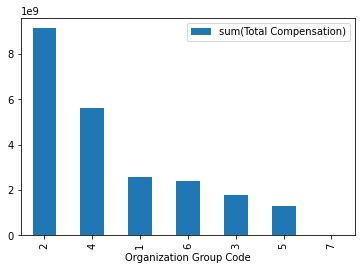

In [21]:
# displaying bar plot
orgdf.plot(x='Organization Group Code', y='sum(Total Compensation)', kind='bar')

#### 5.2. Find top Compensating Jobs. Display using bar plot

In [22]:
# Finding top Compensating Jobs
jobdf = empcomDF3.groupby('Job Code').sum('Total Compensation')

In [23]:
jobdf.show(5)

+--------+-----------------------+
|Job Code|sum(Total Compensation)|
+--------+-----------------------+
|    7340|             9174892.49|
|    7253|      5196714.900000001|
|    9376|              909278.61|
|    7240|      766794.6200000001|
|    1460|             9506938.71|
+--------+-----------------------+
only showing top 5 rows



In [24]:
job_df = jobdf.toPandas()

job_df

,Job Code,sum(Total Compensation)
0,7340,9174892.49
1,7253,5196714.90
2,9376,909278.61
3,7240,766794.62
4,1460,9506938.71
...,...,...
1010,8350,56324.40
1011,1367,4581.44
1012,3246,4552.04
1013,8213,3944.57


In [25]:
job_df = job_df.sort_values(by=['sum(Total Compensation)'], ascending=False).head(10)

In [26]:
job_df

,Job Code,sum(Total Compensation)
803,9163,1.631579e+09
186,2320,1.404298e+09
918,8304,6.621447e+08
380,8177,5.085730e+08
676,2708,4.177782e+08
804,2303,3.228093e+08
66,2905,2.576839e+08
799,7371,2.201505e+08
332,9139,2.128865e+08
560,2328,2.092410e+08


<AxesSubplot:xlabel='Job Code'>

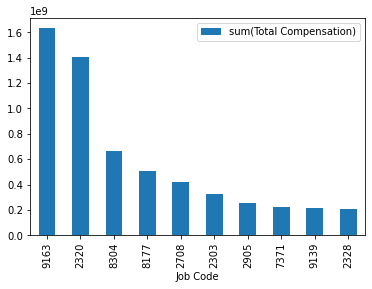

In [27]:
# displaying bar plot
job_df.plot(x='Job Code', y='sum(Total Compensation)', kind='bar')

#### 5.3. Check Correlation of Target Variable with Other Independent Variables. Plot Heatmap

In [28]:
emp_df = empcomDF3.toPandas()

In [29]:
corrM = emp_df.corr()

corrM

,Year,Organization Group Code,Union Code,Job Family Code,Job Code,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
Year,1.000000,-0.008066,0.000499,0.005013,0.004997,0.000437,0.010317,0.016648,-0.001723,0.012157,0.022726,-0.019205,0.032947,0.014987,0.013037
Organization Group Code,-0.008066,1.000000,0.185864,-0.408631,-0.411874,0.003126,-0.106523,-0.223804,-0.112393,-0.149806,-0.145547,-0.169926,-0.062933,-0.144444,-0.149911
Union Code,0.000499,0.185864,1.000000,-0.141666,-0.146441,-0.002694,-0.158040,-0.112599,0.046283,-0.158717,-0.149919,-0.090707,-0.204535,-0.156853,-0.159841
Job Family Code,0.005013,-0.408631,-0.141666,1.000000,0.995053,-0.004662,-0.123682,0.276137,0.051599,-0.058065,-0.069156,-0.038087,-0.154055,-0.084692,-0.065689
Job Code,0.004997,-0.411874,-0.146441,0.995053,1.000000,-0.005024,-0.114382,0.274664,0.051763,-0.049821,-0.061185,-0.033185,-0.143933,-0.076508,-0.057377
Employee Identifier,0.000437,0.003126,-0.002694,-0.004662,-0.005024,1.000000,-0.001193,0.001819,-0.001233,-0.000911,0.000411,-0.000326,-0.000924,-0.000009,-0.000665
Salaries,0.010317,-0.106523,-0.158040,-0.123682,-0.114382,-0.001193,1.000000,0.139427,0.307592,0.972852,0.965021,0.764915,0.856024,0.954866,0.977949
Overtime,0.016648,-0.223804,-0.112599,0.276137,0.274664,0.001819,0.139427,1.000000,0.303601,0.339203,0.210308,0.253243,0.188037,0.232944,0.314516
Other Salaries,-0.001723,-0.112393,0.046283,0.051599,0.051763,-0.001233,0.307592,0.303601,1.000000,0.450545,0.359204,0.219288,0.196412,0.309057,0.417659
Total Salary,0.012157,-0.149806,-0.158717,-0.058065,-0.049821,-0.000911,0.972852,0.339203,0.450545,1.000000,0.959461,0.768200,0.837149,0.948369,0.996467


<AxesSubplot:>

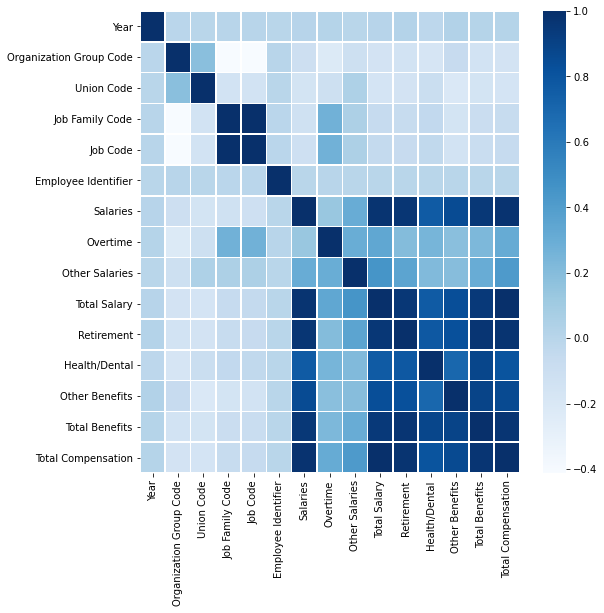

In [30]:
plt.figure(figsize=(8.5,8.5))
sns.heatmap(corrM, cmap='Blues', linewidths =.5)

### 6. Perform necessary data pre-processing and divide the data into train and test set

#### 6.1 Categorise the attributes into its type (Use one hot encoding wherever required)

In [31]:
from pyspark.ml.feature import StringIndexer
indexers = StringIndexer(inputCols= ['Year Type', 'Department Code'], 
                         outputCols=['YearType_indexed', 'Department Code_indexed'])
strindexedDF = indexers.fit(empcomDF3).transform(empcomDF3)
strindexedDF.select('Year Type', 'Department Code', 'YearType_indexed', 'Department Code_indexed').show(5, False)

+---------+---------------+----------------+-----------------------+
|Year Type|Department Code|YearType_indexed|Department Code_indexed|
+---------+---------------+----------------+-----------------------+
|Fiscal   |DAT            |0.0             |17.0                   |
|Calendar |ART            |1.0             |42.0                   |
|Calendar |DPH            |1.0             |0.0                    |
|Fiscal   |DPH            |0.0             |0.0                    |
|Fiscal   |REC            |0.0             |3.0                    |
+---------+---------------+----------------+-----------------------+
only showing top 5 rows



In [32]:
from pyspark.ml.feature import OneHotEncoder
encoder = OneHotEncoder(inputCols= ['YearType_indexed', 'Department Code_indexed'], 
                         outputCols=['YearType_vec', 'Department Code_vec'])
encodedDF = encoder.fit(strindexedDF).transform(strindexedDF)
encodedDF.select('YearType_indexed', 'Department Code_indexed', 'YearType_vec', 'Department Code_vec').show(5, False)

+----------------+-----------------------+-------------+-------------------+
|YearType_indexed|Department Code_indexed|YearType_vec |Department Code_vec|
+----------------+-----------------------+-------------+-------------------+
|0.0             |17.0                   |(1,[0],[1.0])|(52,[17],[1.0])    |
|1.0             |42.0                   |(1,[],[])    |(52,[42],[1.0])    |
|1.0             |0.0                    |(1,[],[])    |(52,[0],[1.0])     |
|0.0             |0.0                    |(1,[0],[1.0])|(52,[0],[1.0])     |
|0.0             |3.0                    |(1,[0],[1.0])|(52,[3],[1.0])     |
+----------------+-----------------------+-------------+-------------------+
only showing top 5 rows



In [33]:
from pyspark.ml.feature import VectorAssembler

features_col = ['YearType_vec', 'Year', 'Organization Group Code', 'Department Code_vec', 'Union Code', 
                'Job Family Code', 'Job Code', 'Employee Identifier', 'Salaries', 'Overtime', 'Other Salaries', 
                'Total Salary', 'Retirement', 'Health/Dental', 'Other Benefits', 'Total Benefits']

# Create the VectorAssembler object
assembler = VectorAssembler(inputCols= features_col, outputCol= "features")
assembledDF = assembler.transform(encodedDF)
assembledDF.select("features").show(5, False)

+--------------------------------------------------------------------------------------------------------------------------------------------------------------+
|features                                                                                                                                                      |
+--------------------------------------------------------------------------------------------------------------------------------------------------------------+
|(67,[0,1,2,20,55,56,57,58,59,61,62,63,64,65,66],[1.0,2016.0,1.0,1.0,311.0,8100.0,8177.0,49919.0,114473.16,1500.0,115973.16,21025.98,13068.8,9368.71,43463.49])|
|(67,[1,2,45,55,56,57,58,59,62,63,64,65,66],[2013.0,5.0,1.0,790.0,1800.0,1844.0,1225.0,84077.11,84077.11,16587.3,12457.73,6931.91,35976.94])                   |
|(67,[1,2,3,55,56,57,58,59,61,62,64,65,66],[2015.0,4.0,1.0,535.0,2900.0,2903.0,34873.0,9980.17,798.43,10778.6,2254.93,835.11,3090.04])                         |
|(67,[0,1,2,3,55,56,57,58,59,62,64

#### 6.2 Split the data into train and test set

In [34]:
# We spilt the data into 75-25 set
# Training Set - 75% obesevations
# Testing Set - 25% observations
trainDF, testDF =  assembledDF.randomSplit([0.75,0.25])

# print the count of observations in each set
print("Observations in training set = ", trainDF.count())
print("Observations in testing set = ", testDF.count())

Observations in training set =  184923
Observations in testing set =  61678


### 7. Fit Linear Regression model on the data and check its performance

In [35]:
from pyspark.ml.regression import LinearRegression

lr = LinearRegression(featuresCol = 'features', labelCol='Total Compensation', maxIter=10, 
                      regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(trainDF)

trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

lr_predictions = lr_model.transform(testDF)
lr_predictions.select("prediction","Total Compensation","features").show(10)

RMSE: 1919.710405
r2: 0.999076
+------------------+------------------+--------------------+
|        prediction|Total Compensation|            features|
+------------------+------------------+--------------------+
| 51730.39355508657|          48209.58|(67,[1,2,32,55,56...|
|143716.64406193641|         142735.79|(67,[1,2,32,55,56...|
| 167651.5599601032|         167569.95|(67,[1,2,32,55,56...|
| 86889.91288603377|          87566.79|(67,[1,2,32,55,56...|
|124827.32960050827|         127627.75|(67,[1,2,32,55,56...|
|113332.71112286503|         115761.37|(67,[1,2,32,55,56...|
|124945.26475245936|         127738.34|(67,[1,2,32,55,56...|
|101017.18098411243|         101914.07|(67,[1,2,32,55,56...|
| 85346.38004551083|          85925.26|(67,[1,2,32,55,56...|
| 33752.16440370318|          31984.87|(67,[1,2,32,55,56...|
+------------------+------------------+--------------------+
only showing top 10 rows



In [36]:
from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="Total Compensation",metricName="r2")
print("R Squared (R2) on val data = %g" % lr_evaluator.evaluate(lr_predictions))

R Squared (R2) on val data = 0.999054


### 8. Fit Decision Tree Regression model on the data and check its performance (Optional)

In [ ]:
from pyspark.ml.regression import DecisionTreeRegressor
dt = DecisionTreeRegressor(featuresCol ='scaled_features', labelCol = 'Total Compensation')
dt_model = dt.fit(trainDF)

### Model Persistence (Optional)
Model persistence means saving your model to a disk. After you finalize your model for prediction depending upon the performance, you need to save the model to the disk. Let's say, you finalize 'lrmodel' to be used for in production environment i.e. in your application. We use the following code to save it.

##### Saving the model

In [ ]:
# use save() method to save the model
# write().overwrite() is usually used when you want to replace the older model with a new one
# It might happen that you wish to retrain your model and save it at the same the place
lrmodel.write().overwrite().save("/FileStore/models/lrmodel")

##### Loading the model

In [ ]:
# import PipelineModel from pyspark.ml package
from pyspark.ml import PipelineModel

# load the model from the location it is stored
# The loaded model acts as PipelineModel
pipemodel = PipelineModel.load("/models/lr_model")

# use the PipelineModel object to perform prediciton on test data. 
# Use .transform() to perfrom prediction
prediction = pipemodel.transform(testDF)

# print the results
prediction.select("prediction","Total Compensation","features").show(10)